Integrantes 

-Bryan Meza

-Carlos García

Taller 2 Analisis exploratorio de datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Apertura del dataframe
santiago_airbnb=pd.read_csv("C:/Users/cgarciaa/Desktop/Airbnb_Santiago.csv", sep=';', encoding='latin-1')

In [4]:
# Filtrar y mostrar las filas que están completamente vacías en el DataFrame
rows_completely_null = santiago_airbnb[santiago_airbnb.isnull().all(axis=1)]

# Mostrar las filas completamente nulas
rows_completely_null


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se observa que la fila 9549 esta completamente nula, se procede a eliminarla

In [5]:
# Eliminar las filas que están completamente vacías del DataFrame
santiago_airbnb_cleaned = santiago_airbnb.dropna(how='all')

In [6]:
column_data_types = santiago_airbnb_cleaned.dtypes

In [7]:
column_data_types

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                           object
longitude                          object
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                  object
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
dtype: object

In [8]:
non_numeric_ids = santiago_airbnb_cleaned[~santiago_airbnb_cleaned['id'].str.isnumeric()]

# Mostrar los valores no numéricos en la columna 'id'
non_numeric_ids[['id']]

,id
77,"Barrio Italia ."""
461,(Gayfriendly)
462,"Copa America"""
709,"Casa familiar"""
1324,"1"""
...,...
13112,"1,1886E+18"
13113,"1,18863E+18"
13114,"1,18868E+18"
13115,"1,18873E+18"


In [9]:
# Filtrar valores que son texto (letras no numéricas excluyendo la 'E')
string_only_ids = non_numeric_ids[non_numeric_ids['id'].str.contains(r'[a-df-zA-DF-Z]', na=False)]

# Contar y mostrar los valores que son texto y no notación exponencial
string_only_count = string_only_ids.shape[0]
print(f"Total de IDs que son texto no numérico (excluyendo notación exponencial): {string_only_count}")
print(string_only_ids[['id']])

# Filtrar los valores que están en notación exponencial
exponential_ids = non_numeric_ids[non_numeric_ids['id'].str.contains('E', case=False, na=False)]

# Contar y mostrar los valores en notación exponencial
exponential_count = exponential_ids.shape[0]
print(f"Total de IDs en notación exponencial: {exponential_count}")
print(exponential_ids[['id']])

Total de IDs que son texto no numérico (excluyendo notación exponencial): 62
                          id
77          Barrio Italia ."
461           (Gayfriendly) 
462            Copa America"
709           Casa familiar"
1456      Ski / Monteblanco"
...                      ...
12106  Edificio con piscina"
12317       Santiago Centro"
12610        Vista Preciosa"
12645         Aluguel Apart"
12736                Ski in"

[62 rows x 1 columns]
Total de IDs en notación exponencial: 7763
                             id
461              (Gayfriendly) 
462               Copa America"
1456         Ski / Monteblanco"
1811             Hermoso depto"
2366   Lastarria -Bellas Artes"
...                         ...
13112                1,1886E+18
13113               1,18863E+18
13114               1,18868E+18
13115               1,18873E+18
13116               1,18873E+18

[7763 rows x 1 columns]


SE tienen 7763 valores no numericos o mal decodificados en la base, de los cuales se tienen que 62 registros son los que tienen el nombre del alojamiento en el ID, es decir, es id no es numerico como en el resto de los casos sino un string, lo cual representa el 0,46% de los datos, al ser pocos datos se proceden a eliminarlos.

In [10]:
santiago_airbnb_cleaned = santiago_airbnb_cleaned[~santiago_airbnb_cleaned['id'].isin(string_only_ids['id'])]

Como se tienen tantos datos con el numero de ID en formato exponencial, se prodece a reemplazar estos valores de ID con una numeración que sigue despues del maximo numero obtenido en el ID

In [11]:
valid_ids = pd.to_numeric(santiago_airbnb_cleaned[~santiago_airbnb_cleaned['id'].str.contains('E', case=False, na=False)]['id'], errors='coerce')
max_id = valid_ids.max(skipna=True)
# Contar cuántos IDs tienen notación exponencial
exp_notation_count = santiago_airbnb_cleaned['id'].str.contains('E', case=False, na=False).sum()
# Generar nuevos IDs secuenciales a partir del máximo ID + 1
new_ids = range(int(max_id) + 1, int(max_id) + 1 + exp_notation_count)
# Reemplazar los valores en notación exponencial con los nuevos IDs
santiago_airbnb_cleaned.loc[santiago_airbnb_cleaned['id'].str.contains('E', case=False, na=False), 'id'] = [str(id) for id in new_ids]
# Verificar que todos los IDs se han reemplazado y no contienen 'E'
remaining_exp_notation_count = santiago_airbnb_cleaned['id'].str.contains('E', case=False, na=False).sum()
santiago_airbnb_cleaned = santiago_airbnb_cleaned.reset_index(drop=True)
# Imprimir el resultado final
print(f"IDs restantes en notación exponencial: {remaining_exp_notation_count}")

IDs restantes en notación exponencial: 0


In [12]:
duplicate_ids = santiago_airbnb_cleaned[santiago_airbnb_cleaned['id'].duplicated()]

# Contar y mostrar los IDs duplicados, si existen
duplicate_count = duplicate_ids.shape[0]

In [13]:
print(f'se tiene un total de {duplicate_count} valores duplicados en IDs')

se tiene un total de 0 valores duplicados en IDs


In [14]:
santiago_airbnb_cleaned.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [15]:
# Función para corregir problemas de codificación de caracteres
def fix_encoding(text):
    if isinstance(text, str):
        # Primero trata de decodificar y recodificar en UTF-8
        try:
            text = text.encode('latin1').decode('utf-8')
        except UnicodeDecodeError:
            pass  # Ignora errores de decodificación y deja el texto tal como está
        # Reemplaza acentos y la letra ñ
        text = text.replace('á', 'a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
        text = text.replace('Á', 'A').replace('É', 'E').replace('Í', 'I').replace('Ó', 'O').replace('Ú', 'U')
        text = text.replace('ñ', 'n').replace('Ñ', 'N')
    return text

# Aplicar la función a todas las columnas de texto
for column in santiago_airbnb_cleaned.select_dtypes(include=['object']).columns:
    santiago_airbnb_cleaned[column] = santiago_airbnb_cleaned[column].apply(fix_encoding)

# Mostrar las primeras filas para verificar que el texto se ve correctamente
santiago_airbnb_cleaned



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-3.343.277,-7.059.892,Private room,50183.0,3.0,0,NaN,NaN,1.0,178.0,0.0,NaN
1,52811,Suite Providencia 1 Santiago Chile,244792,Cristian,NaN,Providencia,-3.342.959,-706.188,Entire home/apt,51130.0,1.0,45,04-11-2021,0.27,3.0,271.0,0.0,NaN
2,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-3.334.521,-7.029.543,Entire home/apt,235714.0,2.0,41,20-06-2024,0.42,1.0,319.0,4.0,NaN
3,65058,Dpto amoblado centro historico,318016,Patricio,NaN,Recoleta,-3.343.049,-7.064.079,Private room,NaN,2.0,0,NaN,NaN,1.0,0.0,0.0,NaN
4,73752,Barrio Lastarria,374124,Daniela&Ricardo,NaN,Santiago,-3.343.865,-7.064.241,Private room,NaN,3.0,0,NaN,NaN,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13049,54410686,Departamento Nuevo a estrenar,371712664,Joaquin,NaN,La Florida,-3.351.784,-7.060.285,Entire home/apt,27992.0,1.0,0,NaN,NaN,1.0,364.0,0.0,NaN
13050,54410687,Comodo apartamento en San Miguel,172010299,Daniela,NaN,San Miguel,-33.485.518.075.567.300,-7.064.588.035.668.410,Entire home/apt,27992.0,1.0,0,NaN,NaN,3.0,2.0,0.0,NaN
13051,54410688,hermoso y comodo departamento.,586174583,Maryury Yurley,NaN,Santiago,-3.344.591,-7.063.334,Entire home/apt,30857.0,1.0,0,NaN,NaN,1.0,171.0,0.0,NaN
13052,54410689,Departamento lindo y acogedor,117754440,Karla,NaN,Nunoa,-334.516.817.464.568,-7.057.827.168.918.770,Entire home/apt,36000.0,7.0,0,NaN,NaN,6.0,21.0,0.0,NaN


¿Existen patrones sospechosos en los datos de los anfitriones, como IDs duplicados o
nombres inusuales?

En el análisis de la columna id, se encontraron 7763 valores sospechosos:

62 registros contenían texto en lugar de un ID numérico, y fueron eliminados.
Los IDs en notación exponencial restantes se reemplazaron por nuevos IDs numéricos secuenciales a partir del ID máximo existente, asegurando un formato coherente.
Además, se identificaron errores de decodificación en algunos nombres y otros campos de texto, donde los caracteres ñ y letras con acentos aparecían incorrectamente codificados. Se aplicó un proceso de limpieza para normalizar estos caracteres y garantizar la legibilidad de los nombres y demás información textual.
Después de estas correcciones, verificamos que no quedaron campos duplicados en la columna id, garantizando unicidad y consistencia en los datos de los anfitriones. Con esta limpieza, los datos están ahora en un formato adecuado para su análisis.

Contamos valores perdidos en el resto de las columnas

In [16]:
missing_values = santiago_airbnb_cleaned.isnull().sum()

# Mostrar el conteo de valores faltantes por columna
missing_values

id                                    0
name                                  0
host_id                              64
host_name                            65
neighbourhood_group               13053
neighbourhood                        64
latitude                             64
longitude                            64
room_type                            64
price                              2060
minimum_nights                       64
number_of_reviews                    64
last_review                        3194
reviews_per_month                  3194
calculated_host_listings_count       64
availability_365                     64
number_of_reviews_ltm                65
license                           12871
dtype: int64

Se proceden a eliminar 2 columnas 'license', 'neighbourhood_group' por la cantidad muy grande de valores perdidos, lo cual hace imposible la imputacion

In [17]:
# Eliminar las columnas 'license' y 'neighbourhood_group' debido a la gran cantidad de valores faltantes
santiago_airbnb_cleaned = santiago_airbnb_cleaned.drop(columns=['license', 'neighbourhood_group'])

# Verificar que las columnas han sido eliminadas
santiago_airbnb_cleaned.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

¿Cuál es la distribución de los tipos de alojamiento en Santiago?

In [18]:
missing_values = santiago_airbnb_cleaned.isnull().sum()

# Mostrar el conteo de valores faltantes por columna
missing_values

id                                   0
name                                 0
host_id                             64
host_name                           65
neighbourhood                       64
latitude                            64
longitude                           64
room_type                           64
price                             2060
minimum_nights                      64
number_of_reviews                   64
last_review                       3194
reviews_per_month                 3194
calculated_host_listings_count      64
availability_365                    64
number_of_reviews_ltm               65
dtype: int64

In [19]:
# Filtrar las filas que tienen valores faltantes en cualquier columna
missing_data_rows = santiago_airbnb_cleaned[santiago_airbnb_cleaned.isnull().any(axis=1)]

# Mostrar las filas con valores faltantes
missing_data_rows  # Muestra las primeras filas como ejemplo



,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,49392,Share my Flat in Providencia,224592,Maria,Providencia,-3.343.277,-7.059.892,Private room,50183.0,3.0,0,NaN,NaN,1.0,178.0,0.0
3,65058,Dpto amoblado centro historico,318016,Patricio,Recoleta,-3.343.049,-7.064.079,Private room,NaN,2.0,0,NaN,NaN,1.0,0.0,0.0
4,73752,Barrio Lastarria,374124,Daniela&Ricardo,Santiago,-3.343.865,-7.064.241,Private room,NaN,3.0,0,NaN,NaN,1.0,0.0,0.0
5,80482,Room Private for Woman,154527,Jacqueline,La Florida,-3.351.922,-7.059.152,Private room,NaN,2.0,0,NaN,NaN,1.0,0.0,0.0
9,95139,Room Family Home,506998,Rafael,Santiago,-3.343.657,-7.067.851,Private room,NaN,7.0,0,NaN,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13049,54410686,Departamento Nuevo a estrenar,371712664,Joaquin,La Florida,-3.351.784,-7.060.285,Entire home/apt,27992.0,1.0,0,NaN,NaN,1.0,364.0,0.0
13050,54410687,Comodo apartamento en San Miguel,172010299,Daniela,San Miguel,-33.485.518.075.567.300,-7.064.588.035.668.410,Entire home/apt,27992.0,1.0,0,NaN,NaN,3.0,2.0,0.0
13051,54410688,hermoso y comodo departamento.,586174583,Maryury Yurley,Santiago,-3.344.591,-7.063.334,Entire home/apt,30857.0,1.0,0,NaN,NaN,1.0,171.0,0.0
13052,54410689,Departamento lindo y acogedor,117754440,Karla,Nunoa,-334.516.817.464.568,-7.057.827.168.918.770,Entire home/apt,36000.0,7.0,0,NaN,NaN,6.0,21.0,0.0


In [20]:
# Eliminar las filas donde 'room_type' es nulo
santiago_airbnb_cleaned = santiago_airbnb_cleaned[santiago_airbnb_cleaned['room_type'].notnull()]

# Verificar el tamaño del DataFrame después de la eliminación
santiago_airbnb_cleaned.shape
 # Contar valores faltantes y mostrar las primeras filas


(12990, 16)

In [21]:
missing_values = santiago_airbnb_cleaned.isnull().sum()

# Mostrar el conteo de valores faltantes por columna
missing_values

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1996
minimum_nights                       0
number_of_reviews                    0
last_review                       3130
reviews_per_month                 3130
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                1
dtype: int64

Despues de eliminar la columna que tenian la fila room type nulo se eliminaron, limpiando la mayoría de las columnas restante

In [22]:
# Eliminar las filas donde 'room_type' tiene el valor '73854'
santiago_airbnb_cleaned = santiago_airbnb_cleaned[santiago_airbnb_cleaned['room_type'] != '73854']

# Verificar el tamaño del DataFrame después de la eliminación
santiago_airbnb_cleaned.shape


(12989, 16)

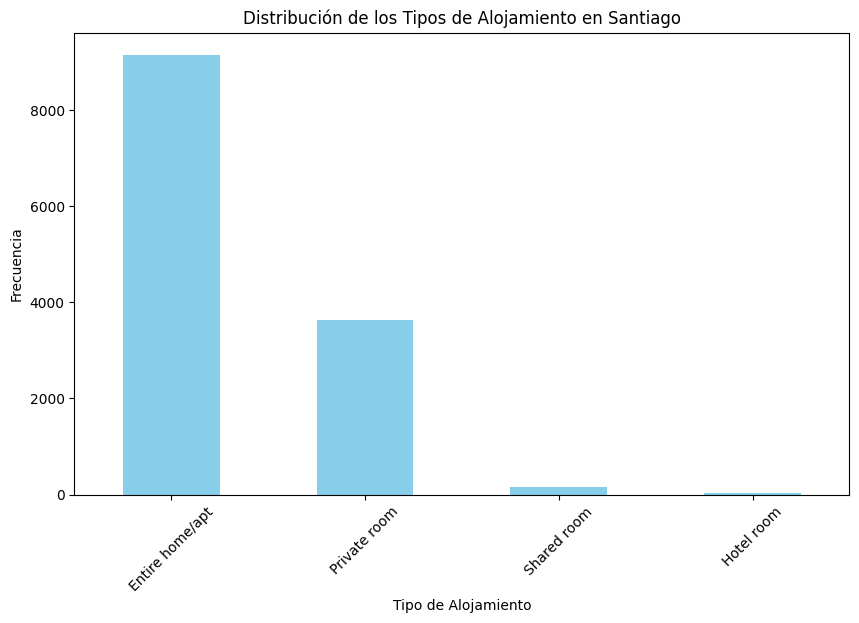

In [23]:
# Contar los tipos de alojamiento
room_type_counts = santiago_airbnb_cleaned['room_type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de los Tipos de Alojamiento en Santiago')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Calcular el porcentaje de cada tipo de alojamiento en la columna 'room_type'
room_type_percentages = santiago_airbnb_cleaned['room_type'].value_counts(normalize=True) * 100

# Mostrar los porcentajes
room_type_percentages


room_type
Entire home/apt    70.528909
Private room       27.931327
Shared room         1.285703
Hotel room          0.254061
Name: proportion, dtype: float64

¿Cuál es la distribución de los tipos de alojamiento en Santiago?

La distribución de tipo de alojamiento en santiago es 70,50% para departamento completo, 27.9% para habitación privada, 1.28% habitación compartida y habitación de hotel un 0,25%.

¿Cómo varían los precios de los alojamientos según la comuna?


reemplazamos los precios faltantes con el promedio de precios la comuna y el tipo de alojamiento 

In [25]:
# Calcular el promedio de 'price' por 'neighbourhood' y 'room_type'
price_means = santiago_airbnb_cleaned.groupby(['neighbourhood', 'room_type'])['price'].mean()

# Usar estos promedios para llenar los valores faltantes en 'price'
santiago_airbnb_cleaned['price'] = santiago_airbnb_cleaned.apply(
    lambda row: price_means[row['neighbourhood'], row['room_type']] if pd.isnull(row['price']) else row['price'], axis=1
)



In [26]:
missing_values = santiago_airbnb_cleaned.isnull().sum()

# Mostrar el conteo de valores faltantes por columna
missing_values

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                6
minimum_nights                       0
number_of_reviews                    0
last_review                       3130
reviews_per_month                 3130
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [27]:
# Crear la tabla pivote para el precio promedio por comuna y tipo de alojamiento
price_pivot_table = santiago_airbnb_cleaned.pivot_table(
    values='price', 
    index='neighbourhood', 
    columns='room_type', 
    aggfunc='mean'
).round(0)

# Calcular el promedio simple (sin considerar el tipo de alojamiento) por comuna
price_pivot_table['Promedio General'] = santiago_airbnb_cleaned.groupby('neighbourhood')['price'].mean().round(0)

# Ordenar la tabla pivote por la columna 'Promedio General' de mayor a menor
price_pivot_table = price_pivot_table.sort_values(by='Promedio General', ascending=False)

# Mostrar la tabla pivote ordenada
price_pivot_table




room_type,Entire home/apt,Hotel room,Private room,Shared room,Promedio General
neighbourhood,,,,,
Lo Barnechea,341553.0,568111.0,148510.0,182610.0,324620.0
San Joaquin,48187.0,NaN,793102.0,NaN,296492.0
Pudahuel,65542.0,NaN,377826.0,NaN,228281.0
Vitacura,141631.0,120000.0,43512.0,35000.0,113239.0
Estacion Central,38288.0,NaN,278545.0,19711.0,95723.0
Providencia,109088.0,907800.0,36179.0,27953.0,87502.0
Nunoa,116400.0,NaN,33425.0,26260.0,81392.0
Las Condes,85345.0,130853.0,40528.0,28343.0,74546.0
La Granja,105750.0,NaN,47580.0,NaN,73433.0


In [61]:
# Crear la tabla pivote para el precio mediano por comuna y tipo de alojamiento
price_pivot_table_median = santiago_airbnb_cleaned.pivot_table(
    values='price', 
    index='neighbourhood', 
    columns='room_type', 
    aggfunc='median'
).round(0)

# Calcular la mediana (sin considerar el tipo de alojamiento) por comuna
price_pivot_table_median['Mediana General'] = santiago_airbnb_cleaned.groupby('neighbourhood')['price'].median().round(0)

# Ordenar la tabla pivote por la columna 'Mediana General' de mayor a menor
price_pivot_table_median = price_pivot_table_median.sort_values(by='Mediana General', ascending=False)

# Mostrar la tabla pivote ordenada
price_pivot_table_median



room_type,Entire home/apt,Hotel room,Private room,Shared room,Mediana General
neighbourhood,,,,,
Lo Barnechea,326567.0,568111.0,115000.0,182610.0,310000.0
Vitacura,115000.0,120000.0,36000.0,35000.0,89000.0
Las Condes,75000.0,130853.0,35000.0,28343.0,64284.0
Providencia,59143.0,907800.0,35000.0,27953.0,50026.0
La Granja,95000.0,NaN,17000.0,NaN,48000.0
Huechuraba,82362.0,NaN,39286.0,75000.0,45239.0
Pudahuel,54286.0,NaN,35000.0,NaN,45000.0
Penalolen,76413.0,NaN,36000.0,80000.0,43504.0
San Joaquin,44357.0,NaN,20500.0,NaN,42604.0


La comparación de precios promedio por comuna puede llevar a conclusiones engañosas debido a la presencia de valores atípicos en algunas comunas, como San Joaquín, que influyen fuertemente en el promedio. Estos valores atípicos elevan significativamente el precio promedio, haciendo que parezca más alto de lo que es en la mayoría de los casos.

Al utilizar la mediana en lugar del promedio, reducimos la influencia de estos valores extremos, ya que la mediana refleja el valor central de los datos y es menos sensible a los precios inusualmente altos o bajos. Por lo tanto, la mediana proporciona una representación más precisa del precio típico en cada comuna, permitiendo una mejor comprensión de la distribución real de los precios de alojamiento en Santiago.

¿Cómo varían los precios de los alojamientos según la comuna?

Los precios de los alojamientos en Santiago, al observar la mediana por comuna, varían significativamente según la zona. Comunas como Lo Barnechea, Vitacura, y Las Condes presentan las medianas más altas, indicando precios generalmente elevados en áreas más exclusivas.

En contraste, comunas como Cerro Navia, San Ramón, y La Cisterna muestran medianas considerablemente más bajas, lo que sugiere opciones de alojamiento más accesibles en estas zonas.

La mediana ayuda a reducir la influencia de valores atípicos altos, ofreciendo una representación más precisa del precio típico, y revela que mientras ciertas comunas tienen precios elevados, otras ofrecen alternativas económicas, reflejando una amplia diversidad de opciones de alojamiento en Santiago.

¿Existen precios atípicamente altos o bajos que no correspondan al mercado? (Ayuda:
puedes utilizar box plots y calcular estadísticas descriptivas para identificar precios
“outliers”)


In [28]:
missing_values = santiago_airbnb_cleaned.isnull().sum()

# Mostrar el conteo de valores faltantes por columna
missing_values

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                6
minimum_nights                       0
number_of_reviews                    0
last_review                       3130
reviews_per_month                 3130
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [30]:
# Eliminar las filas donde 'price' es nulo
santiago_airbnb_cleaned = santiago_airbnb_cleaned[santiago_airbnb_cleaned['price'].notnull()]

# Verificar el tamaño del DataFrame después de la eliminación
santiago_airbnb_cleaned

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,49392,Share my Flat in Providencia,224592,Maria,Providencia,-3.343.277,-7.059.892,Private room,50183.000000,3.0,0,NaN,NaN,1.0,178.0,0.0
1,52811,Suite Providencia 1 Santiago Chile,244792,Cristian,Providencia,-3.342.959,-706.188,Entire home/apt,51130.000000,1.0,45,04-11-2021,0.27,3.0,271.0,0.0
2,53494,depto centro ski el colorado chile,249097,Paulina,Lo Barnechea,-3.334.521,-7.029.543,Entire home/apt,235714.000000,2.0,41,20-06-2024,0.42,1.0,319.0,4.0
3,65058,Dpto amoblado centro historico,318016,Patricio,Recoleta,-3.343.049,-7.064.079,Private room,41795.857143,2.0,0,NaN,NaN,1.0,0.0,0.0
4,73752,Barrio Lastarria,374124,Daniela&Ricardo,Santiago,-3.343.865,-7.064.241,Private room,63079.584992,3.0,0,NaN,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13049,54410686,Departamento Nuevo a estrenar,371712664,Joaquin,La Florida,-3.351.784,-7.060.285,Entire home/apt,27992.000000,1.0,0,NaN,NaN,1.0,364.0,0.0
13050,54410687,Comodo apartamento en San Miguel,172010299,Daniela,San Miguel,-33.485.518.075.567.300,-7.064.588.035.668.410,Entire home/apt,27992.000000,1.0,0,NaN,NaN,3.0,2.0,0.0
13051,54410688,hermoso y comodo departamento.,586174583,Maryury Yurley,Santiago,-3.344.591,-7.063.334,Entire home/apt,30857.000000,1.0,0,NaN,NaN,1.0,171.0,0.0
13052,54410689,Departamento lindo y acogedor,117754440,Karla,Nunoa,-334.516.817.464.568,-7.057.827.168.918.770,Entire home/apt,36000.000000,7.0,0,NaN,NaN,6.0,21.0,0.0


In [31]:
missing_values = santiago_airbnb_cleaned.isnull().sum()

# Mostrar el conteo de valores faltantes por columna
missing_values

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3124
reviews_per_month                 3124
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [34]:
# Calcular Q1, Q3 y IQR para cada combinación de 'neighbourhood' y 'room_type'
Q1 = santiago_airbnb_cleaned.groupby(['neighbourhood', 'room_type'])['price'].quantile(0.25)
Q3 = santiago_airbnb_cleaned.groupby(['neighbourhood', 'room_type'])['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_limits = Q1 - 1.5 * IQR
upper_limits = Q3 + 1.5 * IQR

# Unir estos límites con el DataFrame original
limits = pd.DataFrame({'Q1': Q1, 'Q3': Q3, 'Lower': lower_limits, 'Upper': upper_limits}).reset_index()
santiago_airbnb_with_limits = santiago_airbnb_cleaned.merge(limits, on=['neighbourhood', 'room_type'], how='left')

# Filtrar los outliers por comuna y tipo de alojamiento
outliers = santiago_airbnb_with_limits[(santiago_airbnb_with_limits['price'] < santiago_airbnb_with_limits['Lower']) |
                                       (santiago_airbnb_with_limits['price'] > santiago_airbnb_with_limits['Upper'])]

# Filtrar los datos sin outliers por comuna y tipo de alojamiento
non_outliers = santiago_airbnb_with_limits[(santiago_airbnb_with_limits['price'] >= santiago_airbnb_with_limits['Lower']) &
                                           (santiago_airbnb_with_limits['price'] <= santiago_airbnb_with_limits['Upper'])]

# Mostrar el número de registros en ambas tablas
outliers.shape, non_outliers.shape


((732, 20), (12251, 20))

In [37]:
outliers

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Q1,Q3,Lower,Upper
20,133295,Lux Las Condes Furnished Apartments,13553614,Felipe,Las Condes,-3.341.154,-7.058.899,Entire home/apt,175167.0,10.0,80,22-12-2023,0.52,2.0,365.0,1.0,56885.50,92913.000000,2844.250000,146954.250000
25,142622,"2 bedrooms, 2 bathrooms and parking",639690,Gilda,La Reina,-3.344.324,-7.054.792,Private room,60000.0,3.0,2,16-04-2022,0.02,1.0,363.0,0.0,22857.00,31155.145833,10409.781250,43602.364583
37,191723,"Artsy,joyful flat in nice area",927749,Pilar,Providencia,-3.343.066,-7.058.561,Private room,62899.0,1.0,0,NaN,NaN,1.0,365.0,0.0,22500.00,36178.822496,1981.766257,56697.056239
43,259656,Suite Providencia 2 Santiago Chile,244792,Cristian,Providencia,-3.342.892,-7.061.782,Entire home/apt,5754014.0,1.0,40,13-01-2022,0.26,3.0,301.0,0.0,47749.00,80482.000000,-1350.500000,129581.500000
58,354516,"TURISMO BELLAVISTA, Best View 3",1463563,Arnaldo,Recoleta,-3.343.218,-706.361,Entire home/apt,75748.0,3.0,81,29-04-2024,0.59,6.0,358.0,6.0,33032.25,47257.250000,11694.750000,68594.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12906,54410614,Casa Providencia 9 personas todo cerca 2 parking,550493468,Emmanuel,Nunoa,-3.343.577.505.042.930,-70.583.694.957.987,Entire home/apt,131914.0,1.0,0,NaN,NaN,4.0,360.0,0.0,38980.00,65000.000000,-50.000000,104030.000000
12909,54410617,La Parva familiar 8 esquiadores,85909257,Bernard,Las Condes,-33.416.832.795.558.300,-7.056.879.778.002.850,Entire home/apt,430000.0,2.0,0,NaN,NaN,30.0,255.0,0.0,56885.50,92913.000000,2844.250000,146954.250000
12910,54410618,Casa exquisita y vista increible,559478741,Olga,Las Condes,-334.110.413,-705.983.625,Entire home/apt,385000.0,4.0,0,NaN,NaN,1.0,169.0,0.0,56885.50,92913.000000,2844.250000,146954.250000
12950,54410658,Privacidad y descanso en Centro,257501324,Patricio,Santiago,-3.344.723,-7.065.376,Entire home/apt,238000.0,1.0,0,NaN,NaN,8.0,356.0,0.0,31955.25,50000.000000,4888.125000,77067.125000


In [36]:
# Calcular el rango de precios (mínimo y máximo) en la columna 'price'
price_min = santiago_airbnb_cleaned['price'].min()
price_max = santiago_airbnb_cleaned['price'].max()

price_min, price_max


(np.float64(7077.0), np.float64(62302803.0))

En este análisis, calculamos los precios atípicos de los alojamientos en Santiago según la comuna y el tipo de habitación utilizando el rango intercuartílico (IQR). Los pasos seguidos fueron:

Cálculo de Cuartiles e IQR: Para cada combinación de neighbourhood y room_type, obtuvimos el primer cuartil (Q1) y el tercer cuartil (Q3) de los precios, y calculamos el IQR como la diferencia entre Q3 y Q1.

Definición de Límites de Outliers: Usamos el IQR para definir los límites inferior y superior:

Límite inferior = Q1 - 1.5 * IQR
Límite superior = Q3 + 1.5 * IQR Cualquier precio fuera de este rango es considerado un outlier.
Filtrado de Datos Atípicos y No Atípicos:

Los precios por debajo del límite inferior o por encima del límite superior se clasificaron como outliers.
Los precios dentro de los límites se clasificaron como no atípicos.
Resultados
De este análisis, se identificaron 732 registros que se consideran outliers. Estos precios son significativamente altos o bajos en comparación con los precios típicos de sus respectivas comunas y tipos de alojamiento. La identificación de estos outliers es crucial para comprender la variabilidad de precios en el mercado y ajustar los análisis para reflejar con mayor precisión el comportamiento del mercado general, evitando la influencia de valores extremos.

In [38]:
santiago_airbnb_cleaned

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,49392,Share my Flat in Providencia,224592,Maria,Providencia,-3.343.277,-7.059.892,Private room,50183.000000,3.0,0,NaN,NaN,1.0,178.0,0.0
1,52811,Suite Providencia 1 Santiago Chile,244792,Cristian,Providencia,-3.342.959,-706.188,Entire home/apt,51130.000000,1.0,45,04-11-2021,0.27,3.0,271.0,0.0
2,53494,depto centro ski el colorado chile,249097,Paulina,Lo Barnechea,-3.334.521,-7.029.543,Entire home/apt,235714.000000,2.0,41,20-06-2024,0.42,1.0,319.0,4.0
3,65058,Dpto amoblado centro historico,318016,Patricio,Recoleta,-3.343.049,-7.064.079,Private room,41795.857143,2.0,0,NaN,NaN,1.0,0.0,0.0
4,73752,Barrio Lastarria,374124,Daniela&Ricardo,Santiago,-3.343.865,-7.064.241,Private room,63079.584992,3.0,0,NaN,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13049,54410686,Departamento Nuevo a estrenar,371712664,Joaquin,La Florida,-3.351.784,-7.060.285,Entire home/apt,27992.000000,1.0,0,NaN,NaN,1.0,364.0,0.0
13050,54410687,Comodo apartamento en San Miguel,172010299,Daniela,San Miguel,-33.485.518.075.567.300,-7.064.588.035.668.410,Entire home/apt,27992.000000,1.0,0,NaN,NaN,3.0,2.0,0.0
13051,54410688,hermoso y comodo departamento.,586174583,Maryury Yurley,Santiago,-3.344.591,-7.063.334,Entire home/apt,30857.000000,1.0,0,NaN,NaN,1.0,171.0,0.0
13052,54410689,Departamento lindo y acogedor,117754440,Karla,Nunoa,-334.516.817.464.568,-7.057.827.168.918.770,Entire home/apt,36000.000000,7.0,0,NaN,NaN,6.0,21.0,0.0


In [40]:
# Calcular el valor mínimo y máximo de la columna 'minimum_nights'
min_nights = santiago_airbnb_cleaned['minimum_nights'].min()
max_nights = santiago_airbnb_cleaned['minimum_nights'].max()

min_nights, max_nights


(np.float64(1.0), np.float64(1124.0))

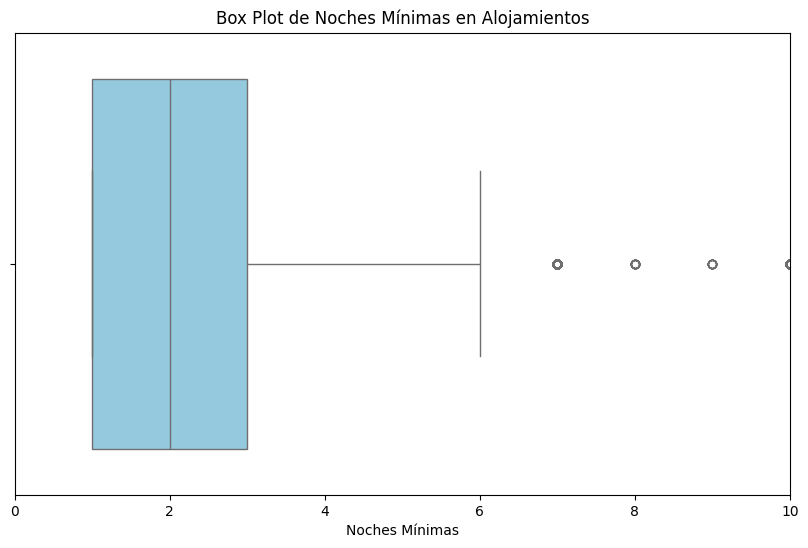

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el box plot con un límite en el eje X
plt.figure(figsize=(10, 6))
sns.boxplot(data=santiago_airbnb_cleaned, x='minimum_nights', color='skyblue')
plt.title('Box Plot de Noches Mínimas en Alojamientos')
plt.xlabel('Noches Mínimas')
plt.xlim(0, 10)  # Limitar el eje X para observar mejor el área principal

plt.show()



In [43]:
# Calcular el primer y tercer cuartil y el IQR para 'minimum_nights'
Q1_min_nights = santiago_airbnb_cleaned['minimum_nights'].quantile(0.25)
Q3_min_nights = santiago_airbnb_cleaned['minimum_nights'].quantile(0.75)
IQR_min_nights = Q3_min_nights - Q1_min_nights

# Calcular los límites para detectar valores atípicos
lower_limit_min_nights = Q1_min_nights - 1.5 * IQR_min_nights
upper_limit_min_nights = Q3_min_nights + 1.5 * IQR_min_nights

# Filtrar los valores que están fuera del rango IQR
outliers_min_nights = santiago_airbnb_cleaned[(santiago_airbnb_cleaned['minimum_nights'] < lower_limit_min_nights) |
                                              (santiago_airbnb_cleaned['minimum_nights'] > upper_limit_min_nights)]

# Contar el número de valores atípicos
num_outliers_min_nights = outliers_min_nights.shape[0]
lower_limit_min_nights, upper_limit_min_nights, num_outliers_min_nights


(np.float64(-2.0), np.float64(6.0), 1334)

¿Hay alojamientos con una cantidad inusualmente alta de noches mínimas?
Hay 1,334 alojamientos que tienen una cantidad de noches mínimas superior a 6 días, lo que se considera inusualmente alto en comparación con la mayoría de los datos en este conjunto. Esto sugiere que existe un número considerable de alojamientos en Santiago que requieren estancias mínimas más largas, las cuales pueden ser atípicas para el mercado general.

Selecciona un conjunto apropiado de variables del dataset que puedan utilizarse para
la detección de outliers multivariados. Justifica tu elección explicando la relevancia de
cada variable seleccionada para este análisis

Para un análisis multivariado enfocado en la detección de outliers en el mercado de alojamientos de Airbnb en Santiago, se utilizarían las siguientes variables:

Selección de Variables
Variables Categóricas:
room_type (Tipo de Alojamiento):
Esta variable es fundamental porque los precios y requisitos de alojamiento pueden variar significativamente según el tipo de alojamiento, como casa entera o habitación privada.
neighbourhood (Comuna):
Los valores de los alojamientos están inherentemente influenciados por su ubicación, lo que hace que la comuna sea una variable relevante para identificar variaciones en el precio y otros aspectos de los alojamientos.
Variables Numéricas:
price (Precio):

Una variable crítica para evaluar valores atípicos en el mercado de alojamientos, ya que precios inusualmente altos o bajos pueden indicar propiedades que no corresponden con el mercado general.
minimum_nights (Noches Mínimas):

Los valores extremos en noches mínimas pueden indicar outliers, ya que muchos usuarios buscan estancias de corta duración, y un mínimo de noches demasiado alto puede hacer que el alojamiento sea poco competitivo.
availability_365 (Disponibilidad en el año):

La disponibilidad anual de un alojamiento es un indicador de la popularidad y el uso del espacio. Alojamientos con disponibilidad extremadamente alta o baja pueden ser considerados outliers, ya que sugieren comportamientos diferentes respecto al mercado promedio.
Justificación para un Análisis Multivariado
Estas variables, tanto categóricas como numéricas, permiten identificar outliers en diferentes dimensiones del mercado. Un análisis multivariado utilizando estas variables puede detectar propiedades que, en términos de tipo de alojamiento, ubicación, precio, noches mínimas, y disponibilidad, se comportan de manera significativamente distinta al resto, proporcionando una visión integral de las anomalías en el mercado de alquileres de Airbnb en Santiago.

xplica cómo la detección de estos outliers puede ser útil para: Mejorar la calidad del
conjunto de datos, obtener insights valiosos sobre el mercado de Airbnb en Santiago y
tomar decisiones informadas en el contexto de análisis de datos o negocios

La detección de outliers en un conjunto de datos de Airbnb en Santiago es una herramienta poderosa que ofrece beneficios clave en varios aspectos, desde la mejora de la calidad de los datos hasta la generación de insights para la toma de decisiones estratégicas. A continuación se explican estos beneficios:

1. Mejorar la Calidad del Conjunto de Datos
Eliminación de Errores: Los outliers pueden ser indicadores de errores en el ingreso de datos, como precios incorrectos, noches mínimas inusualmente altas o baja disponibilidad, que no reflejan el comportamiento típico del mercado. Detectar y revisar estos valores ayuda a limpiar el conjunto de datos, eliminando registros que puedan sesgar el análisis.
Consistencia: Al identificar outliers, podemos asegurar que el conjunto de datos sea más consistente y representativo del mercado general. Esto es particularmente útil para modelos predictivos, ya que los datos atípicos pueden afectar negativamente el rendimiento y la precisión de los modelos de machine learning.
Reducción de Ruido: Los outliers representan "ruido" en los datos, especialmente en análisis estadísticos y de machine learning. Eliminar o tratar adecuadamente estos datos mejora la precisión y la interpretabilidad de los análisis.
2. Obtener Insights Valiosos sobre el Mercado de Airbnb en Santiago
Identificación de Segmentos Únicos: Los outliers pueden revelar segmentos de mercado que son diferentes de la norma, como alojamientos de lujo con precios muy altos o alojamientos económicos con noches mínimas largas. Estos segmentos pueden representar nichos de mercado que son atractivos para ciertos tipos de clientes.
Análisis de Comportamiento del Mercado: Al observar los outliers en diferentes comunas y tipos de alojamiento, se pueden identificar patrones de precios y estancias que pueden indicar tendencias en el mercado. Por ejemplo, si una comuna específica muestra precios consistentemente más altos, puede señalar una alta demanda en esa área.
Comprensión de la Variabilidad: Los outliers permiten analizar la variabilidad en el comportamiento de los alojamientos y entender mejor los factores que influyen en precios altos o en disponibilidad baja. Esto ayuda a ajustar estrategias y promociones para satisfacer diferentes necesidades del mercado.